In [1]:
using CSV
using DataFrames
using LaTeXStrings
using Plots; pgfplotsx()
using Statistics

In [2]:
# un-comment and run this cell in order to import the raw data as downloaded from the cluster and aggregate in a single dataframe `df`
# df = DataFrame()
# for i in 1:100
#     append!(df, DataFrame(CSV.File("csv/beta_scaling_nonscaling" * lpad(i, 3, "0") * ".csv")))
# end
# df

In [4]:
# uncomment and run this cell in order to import the aggregated data
df = CSV.read("csv/beta_scaling_nonscaling.csv", DataFrame)

,filter,sparse_input,beta_scaling,beta,dim,mse
,String,Bool,Bool,Float64,Int64,Float64
1,DiagSF,0,0,0.1,8,0.267188
2,DiagSF,0,0,0.1,16,0.350645
3,DiagSF,0,1,0.1,8,0.320495
4,DiagSF,0,0,0.1,32,0.333337
5,DiagSF,0,1,0.0707107,16,0.433151
6,BlockSF,0,0,0.1,8,0.173781
7,DiagSF,0,0,0.1,64,0.59816
8,BlockSF,0,1,0.1,8,0.180894
9,DiagSF,0,1,0.05,32,0.71719


In [68]:
# uncomment and run this cell in order to save the aggregated data
# CSV.write("csv/beta_scaling_nonscaling.csv", df)

"csv/beta_scaling_nonscaling3.csv"

In [5]:
# process data
df2 = groupby(df, [:filter, :beta_scaling, :dim])
df3 = combine(df2, :mse => mean)
df4 = filter(row -> !isnan(row.mse_mean) && row.mse_mean <= 1, df3)

,filter,beta_scaling,dim,mse_mean
,String,Bool,Int64,Float64
1,DiagSF,0,8,0.293419
2,DiagSF,0,16,0.339876
3,DiagSF,0,32,0.403125
4,DiagSF,0,64,0.507504
5,DiagSF,1,8,0.286247
6,DiagSF,1,16,0.450549
7,DiagSF,1,32,0.624802
8,DiagSF,1,64,0.780033
9,DiagSF,1,128,0.885023


In [6]:
# uncomment and run this cell in order to save the aggregated data
CSV.write("csv/beta_scaling_nonscaling_processed.csv", df4)

"csv/beta_scaling_nonscaling_processed.csv"

In [7]:
dim_rng = [8 * 2^i for i in 0:5]

6-element Vector{Int64}:
   8
  16
  32
  64
 128
 256

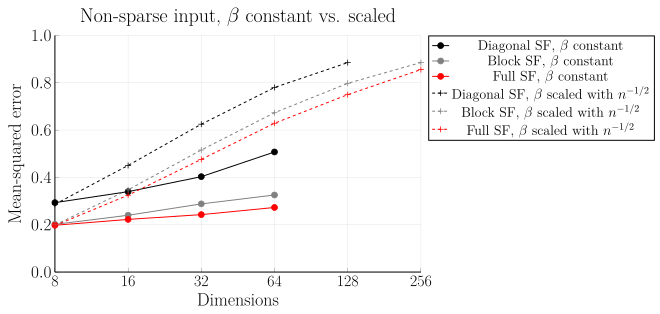

In [8]:
data = filter(row -> row.filter == "DiagSF" && row.beta_scaling == false, df4)
sort!(data, order(:dim))
p = plot(
    data[:, :dim], data[:, :mse_mean], 
    label       = "Diagonal SF, β constant", 
    color       = "black",    
    markershape = :circle,
    #legend      = :bottomright,
    xscale      = :log2,
    xlims       = (8, 256),
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    ylims       = (0, 1),
    yticks      = 0:0.2:1,
    xlabel      = "Dimensions",
    ylabel      = "Mean-squared error",
    title       = "Non-sparse input, β constant vs. scaled",
    titlefont   = (20,),
    tickfont    = (16,),
    guidefont   = (18,),
    legendfontsize = 14
)
data = filter(row -> row.filter == "BlockSF" && row.beta_scaling == false, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label = "Block SF, β constant", 
    color = "gray", 
    markerstrokecolor = "gray",
    markershape = :circle
)
data = filter(row -> row.filter == "FullSF" && row.beta_scaling == false, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label = "Full SF, β constant", 
    color = "red",
    markerstrokecolor = "red",
    markershape = :circle
)

data = filter(row -> row.filter == "DiagSF" && row.beta_scaling == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label = L"Diagonal SF, $\beta$ scaled with $n^{-1/2}$", 
    color = "black", 
    linestyle = :dash,
    markershape = :cross
)
data = filter(row -> row.filter == "BlockSF" && row.beta_scaling == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label = L"Block SF, $\beta$ scaled with $n^{-1/2}$", 
    color = "gray", 
    linestyle = :dash,
    markershape = :cross,
    markerstrokecolor = "gray",
)
data = filter(row -> row.filter == "FullSF" && row.beta_scaling == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label = L"Full SF, $\beta$ scaled with $n^{-1/2}$", 
    color = "red",
    linestyle = :dash,
    markerstrokecolor = "red",
    markershape = :cross
)

In [9]:
savefig("fig/beta_scaling_nonscaling.pdf")